In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
import scipy.io as sio
import matplotlib.patches as patches
import matplotlib.patches as mpatches



# --------------------Indian Zonal Rainfall from year 1901-2022------------------------------

In [2]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]


#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]


#Storing the paths in a array
for i in range(1901,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 1\IndianRainfall_JJAS_Zone1_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 2\IndianRainfall_JJAS_Zone2_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 3\IndianRainfall_JJAS_Zone3_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 4\IndianRainfall_JJAS_Zone4_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 5\IndianRainfall_JJAS_Zone5_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 6\IndianRainfall_JJAS_Zone6_{i}.nc")
  
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))
 


In [6]:
def PlotRainfallMap(data,year=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0  # Minimum value for the color scale
    vmax = 10.0 # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Indian Rainfall {year}')

In [23]:
def giveCombined(zone1,zone2,zone3,zone4,zone5,zone6):
    return zone1.combine_first(zone2.combine_first(zone3.combine_first(zone4.combine_first(zone5.combine_first(zone6)))))

In [26]:
combined_data=[]

for i in range(len(zone1)):
    combined_data.append(giveCombined(zone1[i],zone2[i],zone3[i],zone4[i],zone5[i],zone6[i]))


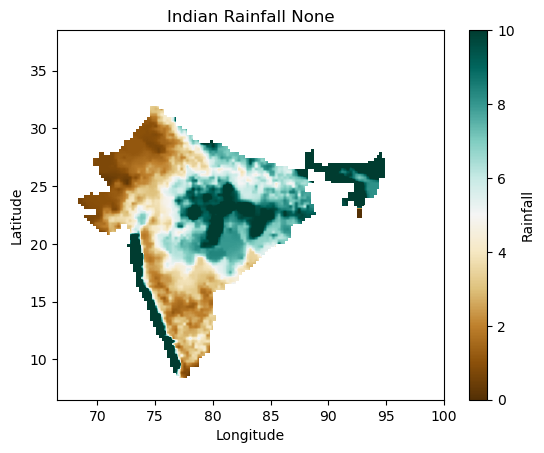

In [28]:
PlotRainfallMap(combined_data[0]['rain'])

In [31]:
yearly_mean=[]


for i in range(len(combined_data)):
    yearly_mean.append(float(combined_data[i]['rain'].mean()))
   

In [32]:
yearly_mean

[6.199511458234083,
 6.694595981271065,
 7.3204269175197965,
 6.30600033081534,
 6.1023330052341835,
 7.34969221299866,
 6.753860057178935,
 7.723085595478371,
 7.523581927116244,
 7.7153217571950075,
 6.306385315929675,
 6.943591054047461,
 6.603966956872422,
 7.741717086494947,
 6.528203421261528,
 8.179481925438234,
 8.677902482120679,
 5.554443190649594,
 7.556014150921513,
 6.248759104309651,
 7.50640285112322,
 7.471146553903582,
 7.096471955168283,
 7.591149856344486,
 6.916185815381962,
 7.80158075794031,
 7.414591326135852,
 6.648586918905122,
 6.794533407961512,
 6.882789825447068,
 7.620492616986309,
 6.897095641485214,
 8.262787005761902,
 7.76430110274814,
 7.253831523172,
 7.741181771875537,
 7.1696142283106905,
 7.728976494859809,
 6.7057132052031045,
 7.153772503558255,
 6.3132085243098945,
 8.113617038837184,
 7.473903786778166,
 7.868695598410461,
 7.6950848749267955,
 7.780416770384875,
 7.761084057675985,
 7.404547565808735,
 7.560303001693237,
 7.541825983207166,
 

In [34]:
df = pd.DataFrame(yearly_mean, columns=['Rainfall Yearly Mean'])
df

,Rainfall Yearly Mean
0,6.199511
1,6.694596
2,7.320427
3,6.306000
4,6.102333
...,...
117,6.729509
118,8.281106
119,8.294390
120,7.528830


In [35]:
# df.to_csv('Rainfall Yearly Mean 1901-2022 without Kashmir and NE.csv')

